In [4]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from random import uniform, randint

In [10]:
class LinearClassifier:

    weights = tf.random_uniform([1,2], dtype=tf.float32)
    learning_rate = uniform(0.0001, 0.001)
    epoch = randint(10, 50)

    
    # Initalizes parameters for new model
    def init(self, new_weights, new_alpha, new_epoch):
        self.theta = new_weights
        self.alpha = new_alpha
        self.epoch = new_epoch    
    
    
    # Given Xhat (Examples x Features)
    # Where Xhat has a rank of 2
    # Returns Yhat (Labels x 1)
    def predict(self, X):
        ones = tf.ones([tf.shape(X)[0], 1], tf.float32)
        x = tf.concat([ones, X], 1)
        x = tf.matmul(x, tf.transpose(self.weights))
        return x
        
        
    # Given predictions(Yhat) and correct labels(Yte)
    # Returns squared mean error
    def cost(self, Yhat, Y):
        squared_error = (Yhat - Y)**2
        b = 1/tf.shape(Yhat)[0]
        return tf.cast(b, tf.float32) * tf.reduce_sum(squared_error)
    
    
    # Given training data X and Y
    # Updates weights with gradient descent
    def train(self, X, Y):
        for i in range(0, self.epoch):
            Yhat = self.predict(X)
            self.weights -= self.learning_rate * tf.transpose(Yhat - Y) * tf.transpose(X)
            
            
    def train_curve(self, X, Y):
        c = np.zeros(self.epoch)
        it = np.zeros(self.epoch)
        for i in range(0, self.epoch):
            Yhat = self.predict(X)
            self.weights -= self.learning_rate * tf.transpose(Yhat - Y) * tf.transpose(X)
            
            squared_error = (Yhat - Y)**2
            b = 1/tf.shape(Yhat)[0]   
            c[i] = (tf.cast(b, tf.float32) * tf.reduce_sum(squared_error)).eval()
            it[i] = i
            
        plt.xlabel("Iterations")
        plt.ylabel("Error")
        plt.plot(it, c)

In [11]:
# TESTING COST FUNCTION

with tf.Session() as sess:
    X = tf.Variable([[7],[11]], dtype=tf.float32)
    Y = tf.Variable([[14],[22]], dtype=tf.float32)
    sess.run(tf.global_variables_initializer())
    
    model = LinearClassifier()
    Yhat = model.predict(X)
    cost = model.cost(Yhat, Y)

    print("Input")
    r = X
    t = tf.Print(r, [r])
    print(sess.run(t))
    
    print("\nWeights")
    r = model.weights
    t = tf.Print(r, [r])
    print(sess.run(t))

    print("\nYhat vs Y")
    r = Y
    t = tf.Print(r, [r])
    r2 = Yhat
    t2 = tf.Print(r2, [r2])
    print("{} vs {}".format(sess.run(t2)[0], sess.run(t)[0]))
    print("{} vs {}".format(sess.run(t2)[1], sess.run(t)[1]))

    print("\nExpected Cost")
    r = ((Yhat[0]-14)**2 + (Yhat[1]-22)**2)/2
    t = tf.Print(r, [r])
    print(sess.run(t))
    
    print("\nCost")
    r = cost
    t = tf.Print(r, [r])
    print(format(sess.run(t)))
    
    print("\nThus squared mean error (COST) works")

0.5
Input
[[ 7.]
 [11.]]

Weights
[[0.36972463 0.6658418 ]]

Yhat vs Y
[5.3119664] vs [14.]
[1.0488117] vs [22.]

Expected Cost
[293.52386]

Cost
166.02584838867188

Thus squared mean error (COST) works


Input
[[10.]
 [15.]]

Weights and epoch and learning rate
[[0.88449216 0.6461903 ]]
21
0.00068396056

Weights trained
[[1.2769774 1.8796918]]

Correct Weights
[[2 2]]

Thus training is successful


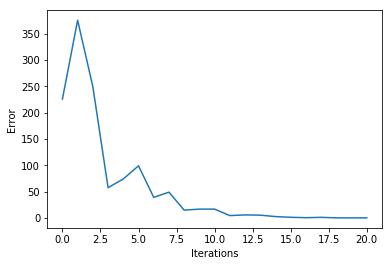

In [6]:
# TESTING TRAIN FUNCTION

with tf.Session() as sess:
    X = tf.Variable([[10],[15]], dtype=tf.float32)
    Y = tf.Variable([[20],[30]], dtype=tf.float32) 
    sess.run(tf.global_variables_initializer())
    
    model = LinearClassifier()    
    Yhat = model.predict(X)

    print("Input")
    r = X
    t = tf.Print(r, [r])
    print(sess.run(t))
    
    print("\nWeights and epoch and learning rate")
    r = model.weights
    t = tf.Print(r, [r])
    r2 = model.epoch
    t2 = tf.Print(r2, [r2])
    r3 = model.learning_rate
    t3 = tf.Print(r3, [r3])
    print(sess.run(t))
    print(sess.run(t2))
    print(sess.run(t3))
    
    model.train_curve(X, Y)
    r = model.weights
    t = tf.Print(r, [r])
    
    print("\nWeights trained")
    print(sess.run(t))
    print("\nCorrect Weights")
    print("[[2 2]]")
    
    print("\nThus training is successful")